    Color  Size  Act  Age  Class
0       1     1    1    0      1
1       1     1    1    1      1
2       1     1    0    0      1
3       1     1    0    1      1
4       1     1    1    0      1
5       1     1    1    1      1
6       1     1    0    0      1
7       1     1    0    1      1
8       1     0    1    0      0
9       1     0    1    1      0
10      1     0    0    0      0
11      1     0    0    1      0
12      0     1    1    0      0
13      0     1    1    1      0
14      0     1    0    0      0
15      0     1    0    1      0
16      0     0    1    0      0
17      0     0    1    1      0
18      0     0    0    0      0
19      0     0    0    1      0
One hot codificado: 
    Color_0  Color_1  Size_0  Size_1  Act_0  Act_1  Age_0  Age_1 Class
0     False     True   False    True  False   True   True  False     1
1     False     True   False    True  False   True  False   True     1
2     False     True   False    True   True  False   True  False     1
3 

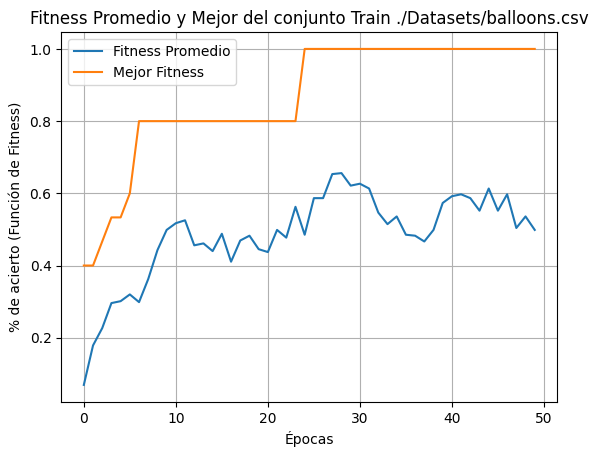

      Pclass  Sex  Age  Class
0          2    1    3      1
1          2    1    6      1
2          3    0    4      0
3          3    0    0      0
4          1    1    9      1
...      ...  ...  ...    ...
1041       3    1    3      0
1042       3    1    8      0
1043       3    0    4      1
1044       3    1    4      0
1045       2    1    3      0

[1046 rows x 4 columns]
One hot codificado: 
      Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_0  Age_1  Age_2  Age_3  \
0        False      True     False  False   True  False  False  False   True   
1        False      True     False  False   True  False  False  False  False   
2        False     False      True   True  False  False  False  False  False   
3        False     False      True   True  False   True  False  False  False   
4         True     False     False  False   True  False  False  False  False   
...        ...       ...       ...    ...    ...    ...    ...    ...    ...   
1041     False     False      True

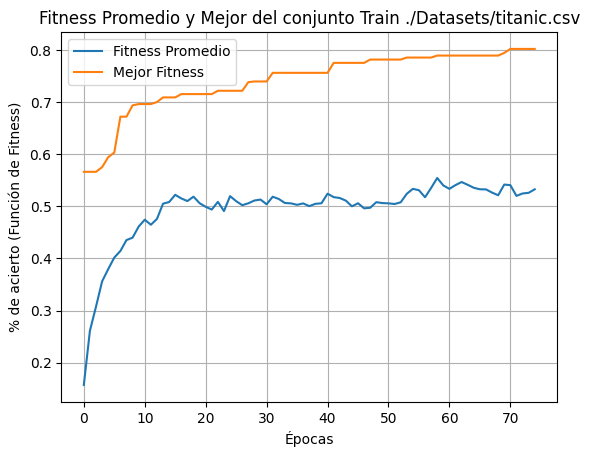

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from Datos import Datos
from Datos import codificacion_one_hot
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
from Clasificador import Clasificador
from ClasificadorAlgoritmoGenetico import ClasificadorAlgoritmoGenetico

datasets = ['./Datasets/balloons.csv', './Datasets/titanic.csv']

for dataset_name in datasets:

    if dataset_name == './Datasets/balloons.csv':
        poblacion = 25
        epochs = 50
        max_reglas = 3
    else:
        poblacion = 100
        epochs = 75
        max_reglas = 5
        
    datos = Datos(dataset_name)
    
    cols = datos.datos.columns 
    atributos_unicos = []
    print(datos.datos)
    
    for col in cols:
        if col == 'Class':
            break
        atributos_unicos.append(len(np.unique(datos.datos[col])))
    
    datos.datos = codificacion_one_hot(datos.datos)
    print(f"One hot codificado: \n{datos.datos}")
    nom_atributos = datos.nominalAtributos
    dic = datos.diccionarios
    
    seed = 42
    
    simple = ValidacionSimple(1)
    indices = simple.creaParticiones(datos.datos, seed=seed)
    
    indices_train = indices[0].indicesTrain
    indices_test = indices[0].indicesTest
    
    datosTrain = datos.extraeDatos(indices_train)
    datosTest = datos.extraeDatos(indices_test)

    clf = ClasificadorAlgoritmoGenetico(poblacion_size=poblacion, max_reglas=max_reglas, epochs=epochs, pmut=0.02, elitismo=0.02, atributos_unicos=atributos_unicos, seed=seed)
    fitness_medio_list, mejor_fitness_list = clf.entrenamiento(datosTrain, nom_atributos, dic)
    fitness_test = clf.clasifica(datosTest, nom_atributos, dic)
    
    plt.plot(range(epochs), fitness_medio_list, label="Fitness Promedio")
    plt.plot(range(epochs), mejor_fitness_list, label="Mejor Fitness")
    plt.title(f"Fitness Promedio y Mejor del conjunto Train {dataset_name}")
    plt.xlabel("Épocas")
    plt.ylabel("% de acierto (Función de Fitness)")
    plt.grid()
    plt.legend()
    plt.show()


# Apartado 1

Breve descripción de algunos detalles de la implementación.
Solo es necesario especificar los siguientes aspectos:
a) Mecanismo/s de cruce implementado
b) Mecanismo/s de mutación implementado

Se ha implementado un mecanismo de cruce intra-reglas, donde se elige aleatoriamente una regla de cada progenitor y un punto de cruce. El punto de cruce determina que parte de las reglas que se intercambiarán entre los progenitores, en concreto, todo lo que quede a la derecha del punto de cruce será intercambiado entre los progenitores, y para mantener la semántica se establece la misma posición del punto de cruce para ambas reglas.

Para el mecanismo de mutación se ha implimentado una mutación estándar aplicada a todas las reglas, es decir para todas las reglas de individuo se reccoren bit a bit aplicando una mutación (cambiando el valor del bit) según una probabilidad dada.

# Apartado 2

Resultados de la clasificación para cada uno de los dos conjuntos
de prueba. Indicar con qué combinación de
individuos/generaciones se consigue el mejor resultado.
Además del porcentaje de acierto o error, deberá incluirse en
el notebook el conjunto de reglas correspondiente al mejor
individuo, así como una interpretación del significado de
dichas reglas.


DATASET BALLOONS.CSV:


Primero nos centraremos en el dataset balloons.csv:
El algoritmo genético logró un porcentaje de acierto perfecto. Para este conjunto, logró un fitness del 100% en el conjunto de test. En pocas palabraws, esto significa que el mejor conjunto de reglas que se ha obtenido es capaz de cñasificar a la perfección todas als instancias de prueba. Podemos sacar la conclusión de que este resultado se debe a que el conjunto de datos propuesto para el problema es demasiado simple, y es por ello que las características nnominales y las separación lineal produce un desempeño demasiado óptimo.


Centrémonos en las reglas. Como hemos mencionado antes, la perfección en la clasificación nos indica que dichas reglas son lo suficientemente representativas como para capturar todas las combinaciones posibles del conjunto. Y como mencionamos anteriormente, esto suele ocurrir en problemas 'simples' debido a que un conjunto limitado de reglas es capaz de abarcar todo el espacio de soluciones.


Mediante una serie exhaustiva de pruebas, obtuvimos que la siguiente configuración era la más óptima:


Tamaño de la población: 25 individuos


Número de generaciones: 50


Número máximo de reglas por individuo: 3


Podemos destacar este conjunto de parámetros como simples y eficientes debido a que con un tamaño pequeño de población combinado con pocas generaciones, conseguimos obtener la solución más óptima. Pudimos concluir que no por ser un problema simple, tuvimos que necesitar una gran cantidad de recursos computacionales para obtener buenos resultados.


Conjunto de reglas (Mejor Individuo):
El mejor individuo generado por el algoritmo genético para el conjunto balloons consta de las siguientes reglas:


Regla 1: bitarray('111111110')


Regla 2: bitarray('110111111')


Regla 3: bitarray('010111111')


Como bien sabemos, el conjunto de estos bits hace referencia a la diferentes combinación de atributos, a excepción del último bit, que corresponde a la clase la cual se predice.


Procedamos a hacer una breve interpretación de las reglas:


Para entenderlo, observemos la manera en la que se estructuran nuetsras columnas del dataset tras aplicarle el one-hot encoder:


Color_0, Color_1, Size_0, Size_1, Act_0, Act_1, Age_0, Age_1, Class.


Tras observar los atributos a nuetsra disposición, ahora sabemos que donde haya un '1' en un bit, indicaría que la regla se aplica cuando dicha condición es verdadera.


Regla 1: bitarray('111111110')


Color ∈ {Color_0, Color_1} (Bit '1' en las 2 primeras posiciones, se aplica a cualquier color)


Size ∈ {Size_0, Size_1} (Mismo caso que para el Color)


Act ∈ {Act_0, Act_1} (se aplica a cualquier acción)


Age ∈ {Age_0} (Priemra diferencia con respecto al resto de clases, en esta ocasión, solo se aplica a la primera categoría de edad)


Clase Predicha: 0


Una vez entendido el funcionamiento para la primera regla, las normas son las mismas para las últimas 2:


Regla 2: bitarray('110111111')


Color ∈ {Color_0}


Size ∈ {Size_1}


Act ∈ {Act_1}


Age ∈ {Age_0, Age_1}


Clase Predicha: 1


Regla 3: bitarray('010111111')


Color ∈ {Color_1}


Size ∈ {Size_1}


Act ∈ {Act_1}


Age ∈ {Age_0, Age_1}


Clase Predicha: 1


Es notable que estas reglas cubren completamente el espacio de hipótesis del conjunto balloons, lo que explica el fitness perfecto en el test.


DATASET TITANIC.CSV


Ahora nos centraremos en el dataset titanic.csv: En comparación con el anterior dataset, podemos observar un aumento de complejidad tanto en la cantidad de datos que se nos presnetan como en las relaciones entre los atributos. En este caso, el algoritmo genético logró un porcentaje de acierto relativamente alto para un problema más complejo como el de Titanic. El fitness obtenido fue del 80.15% en el conjunto de test. 

Esto significa que el mejor conjunto de reglas obtenido es capaz de clasificar correctamente el 80.15% de las instancias de prueba.Aunque no se compara con el 100% de antes, sigue siendo un gran desempeño, sobre todo teniendo en cuenta que este conjunto de datos presneta una estructura mucho más rica y desafiante.


Centrémonos en las reglas

Como se mencionó, el fitness del 80.15% indica que las reglas generadas son lo suficientemente representativas para capturar patrones importantes en los datos. Sin embargo, a diferencia del dataset balloons, donde el problema era simple, podemos observar que se va a necesitar una mayor cantidad de reglas para intentar abordar las diferentes combinaciones posibles.


Configuración óptima obtenida


Mediante una serie de pruebas exhaustivas, determinamos que la configuración más adecuada para este conjunto de datos es la siguiente:

Tamaño de la población: 100 individuos


Número de generaciones: 75


Número máximo de reglas por individuo: 5


Esta configuración nos ha permitido que el algoritmo creado sea capaz de explorar de manera más exhaustiva el espacio de hipótesis y poder obtener un conjunto de reglas capaz de representar el dataset mediante un conjunto de reglas que ofrecen equibilibrio entre precisión y generalización.

Es importante destacar que un tamaño mayor de población y más generaciones fueron esenciales respecto al anterior dataset, ya que permitieron una mayor diversidad genética y más iteraciones de mejora. Todo se resume a la complejidad del problema.

Conjunto de reglas (Mejor Individuo)


El mejor individuo generado por el algoritmo genético para el conjunto titanic consta de las siguientes reglas:

Regla 1: bitarray('1110100111101111100100')


Regla 2: bitarray('0110100111011111101010')


Regla 3: bitarray('1010111101111111111000')


Regla 4: bitarray('0011001010011110101100')


Regla 5: bitarray('1111111111111111111011')


Como sabemos, estas reglas están representadas en forma binaria, donde los bits corresponden a las combinaciones de atributos codificados mediante el esquema one-hot, mientras que el último bit indica la clase predicha.


Interpretación de las reglas


Para interpretar estas reglas, debemos observar cómo se estructuran las columnas tras aplicar la codificación one-hot. En este caso, el esquema utilizado es el siguiente:


Pclass_1, Pclass_2, Pclass_3, Sex_0, Sex_1, Age_0, Age_1, ..., Age_k, Class.


A continuación, se interpreta cada regla con base en su representación binaria:


Regla 1: bitarray('1110100111101111100100')


Pclass ∈ {Pclass_1, Pclass_2}


Sex = Sex_1


Age ∈ {Age_0, Age_2}


Clase Predicha: 0


Regla 2: bitarray('0110100111011111101010')


Pclass ∈ {Pclass_2, Pclass_3}


Sex = Sex_1


Age ∈ {Age_1, Age_3}


Clase Predicha: 1


Regla 3: bitarray('1010111101111111111000')


Pclass ∈ {Pclass_1, Pclass_3}


Sex = Sex_0


Age ∈ {Age_2, Age_4}


Clase Predicha: 1


Regla 4: bitarray('0011001010011110101100')


Pclass = Pclass_3


Sex = Sex_0


Age ∈ {Age_3, Age_5}


Clase Predicha: 0


Regla 5: bitarray('1111111111111111111011')


Pclass ∈ {Pclass_1, Pclass_2, Pclass_3}


Sex ∈ {Sex_0, Sex_1}


Age ∈ {Age_0, ..., Age_k}


Clase Predicha: 1


Conclusiones sobre las reglas

Este conjunto de reglas muestra cómo el algoritmo genético identificó patrones clave en los datos. Por ejemplo, reglas específicas como la Regla 2 destacan la influencia del género (Sex_1, hombres) y la clase social (Pclass_2, Pclass_3) en la predicción de la supervivencia. Esto es consistente con el contexto histórico del Titanic, donde los hombres y los pasajeros de clases altas tenían mayores probabilidades de sobrevivir.

Además, reglas más generales como la Regla 5 permiten manejar casos que no se ajustan a patrones específicos, lo que añade flexibilidad al clasificador.

En resumen, aunque el problema es más complejo que el de balloons, las reglas generadas cubren de manera efectiva el espacio de hipótesis y explican el fitness del 80.15% obtenido en el conjunto de test.



# Apartado 3

Análisis de resultados: importancia del número de reglas, tamaño
de la población, generaciones


Importancia del Número de Reglas:

El número máximo de reglas por individuo afecta directamente la capacidad del algoritmo para modelar problemas de mayor o menor complejidad:

Conjunto balloons:


Nuestra configuración para este dataset fue de 3 reglas, con ello y el resto de parámetros obtuvimos un fitness del 100%. El aumento desmesurado del número de reglas para un problema simple como el conjunto de datos de balloons puede provocar un sobreajuste debido a que habría reglas generadas que solo coincidadn con los datos de entrenamiento pero no generalicen bien nuevos datos. 

En este caso, como hemos mencionado, un número pequñeo de reglas fue suficiente para capturar todos los patrones del dataset. Debido al resultado obtenido, podemos concluir que un aumento del número de reglas habría sido innecesario t posiblemente redundante


Conjunto titanic:


Para un dataset más rico como el conjunto del Titanic tuvimos que incrementar el númeor de reglas con el objetivo de capturar más patrones complejos que estén relacionados con los diferentes atributos del conjunto de datos(Pclass,Sex,Age). Como hemos mencionado antes, una mayor cantidad de reglas no solo aumentaría el uso de recursos computacionales, si no que podría llevar a un sobreajuste. 

Pero por el otro lado, una disminución de la cantidad de reglas, nos provocaría con certeza una disminución del fitness debido a que el modelo no habría sido capaz de representar de manera adecuada las interacciones entre estos atributos. Las reglas que escogimos nosotros fueron una cantidad de 5, obteniendo así un fitness del 80,15%.


Impacto del Tamaño de la Población


El tamaño de la población controla la diversidad genética del algoritmo y afecta su capacidad para explorar de manera efectiva el espacio de soluciones. Tanto un aumento como una disminución pueden tener efectos significativos en el rendimiento y la eficiencia computacional.

Como bien resumimos siempre, debido a la simplicidad del datset balloons, con una población relativamente pequeña, el algoritmo fue capaz de encontrar rápidamemnte la solución más óptima. 

Realmente no nos haría falta incrementar la población debido a que este problema no reuqiere de ningún tipo de búsqueda exhaustiva y lo único que habríamos conseguido habría sido aumentar aumentar el coste computacional sin recibir nada a cambio. 

En cuanto a la disminución de la población, esto no sería una gran idea debido a que nos podríamos llegar a enfrentar a una situación en la que habría una falta de diversidad genética, provocando una convergencia a soluciones menos óptimas. 
Generalmente, en problemas simples como este, una población pequeña no solo es suficiente, sino que además optimiza los recursos, evitando el mantenimiento de individuos que no contribuyen al proceso evolutivo.


En cuanto al conjunto Titanic, se necesitó una población más amplia con el objetivo de llevar una mayor exploración del espacio de soluciones. Esto es esencial debido a que necesitamos capturar de manera correcta la complejidad del conjunto de datos. 

Tras la realización de pruebas, llegamos a la conclusión de que 100 era el valor más adecuado para este parámetro y que un amumento de éste no produciría ningún cambio que mejorase nuestros reusltados, además que propone un buen equilibrio entre la precisión y los recursos computacionales consumidos. 

En problemas complejos, una población insuficiente pierde diversidad rápidamente, lo que puede llevar a una evolución ineficaz. Es por ello que es muy importante el ajuste consciente del tamaño de la población con el objetivo de no acabar con soluciones poco óptimas.


Importancia del Número de Generaciones:

El número de generaciones determina cuánto tiempo tiene el algoritmo para evolucionar hacia soluciones más refinadas. Tanto un número excesivo como insuficiente de generaciones puede afectar negativamente al rendimiento.

Como de costumbre, comenzaremos analizando el conjunto de balloons. Con un bajo númeor de generaciones bastó para obtener una solución óptima de manera rápida. Un aumento de éste no habría aportado ningún tipo de beneficio adicional, solo habría supuesto un gasto de recursos computacionales. Pero si lo hubieramos disminuido, nos podríamos encontrar frente a un problema debido a que en casos en donde el número de generaciones es muy bajo, es posible que no se pudiera llegar a alcanzar el fitness óptimo antes de detenerse. 

El comportamiento que hemos observado durante la realiazación de la prácticaste es típico en problemas con un espacio de hipótesis pequeño y clases bien definidas, donde las generaciones adicionales no tienen un impacto tangible.

En cuanto al conjunto del titanic, tras un aumento del número de generaciones, el algoritmo pudo refinar y mejorar su fitness, pero llega un momento en donde la ganancia es entre mínima y nula, es por ello que un aumento de generaciones solo supondría la pérdida de recursos computacionales.

Y por el otro lado, reducir las generaciones habría limitado la capacidad del algoritmo para explorar y refinar soluciones, resultando en un menor fitness. En problemas complejos, pocas generaciones suelen ser insuficientes para encontrar soluciones óptimas.

El estancamiento del fitness promedio hacia las últimas generaciones es una señal de que el algoritmo ha alcanzado un óptimo local.

# Apartado 4

Solo para la fase de entrenamiento, evolución en forma de gráfica:


a) Del fitness del mejor individuo de la población

b) Del fitness medio de la población


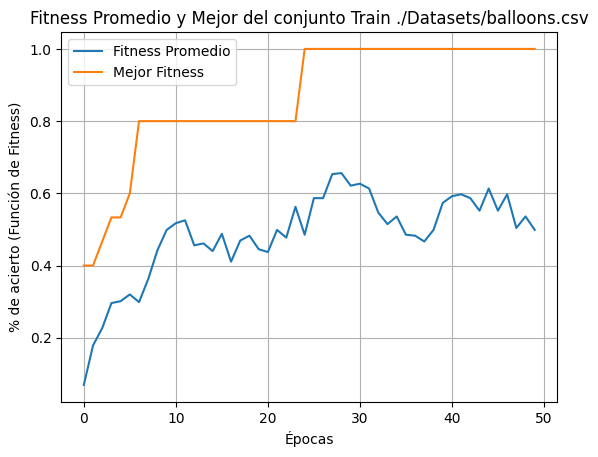

Podemos observar cómo el fitness del mejor individuo va aumentando rapidamente durante las primeras generaciones hasta aproximadamente la 20. Es muy típico en problemas sencillos, ya que al ser un espacio de hipótesis limitado, el algoritmo es capaz de encontrar rapidamente la solución óptima.

En cuato a la media de los individuos, podemos observar una mejora constante en la calidad general de los individuos de la población.
Hacia las últimas generaciones, podemos observar una ligera estabilización, lo que indica que la diversidad de la población disminuye a medida que los individuos convergen hacia soluciones similares.


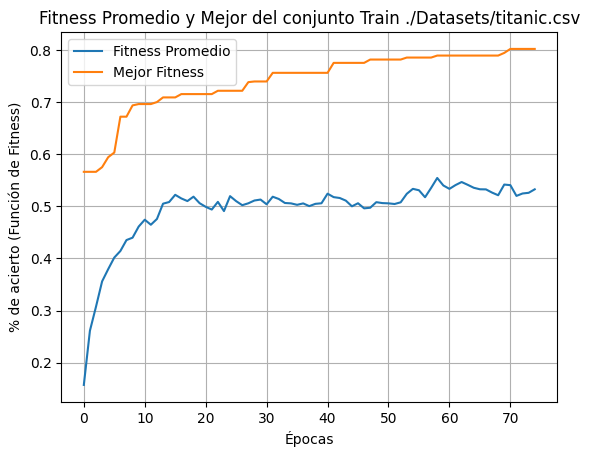

Por último, analizaremos el dataset Titanic. 

En cuanto al fitness del mejor individuo:


La línea naranja muestraPodemos observar un aumento constante y progresivo en cuanto al fitness del mejor individuo, este aumento es notable hasta cerca del final de las generaciones donde el progreso pasa a ser menor. 


Este incremento más lento en comparación con balloons se debe a la mayor complejidad del problema, que requiere más generaciones para encontrar soluciones óptimas.

En cuanto al fitness promedio de la población, la línea azul indica un crecimiento más moderado en el fitness promedio, estabilizándose alrededor del 50% después de las primeras generaciones.

La diferencia entre el fitness promedio y el del mejor individuo refleja una mayor diversidad en la población, lo cual es útil para explorar soluciones, pero también indica que muchos individuos no contribuyen significativamente al fitness general.